## Mirror Density Chart

You can draw a basic density chart using the `kdeplot()` function of [seaborn](https://python-graph-gallery.com/seaborn/). The example below shows how to add a mirror density chart to your figure. It can be achieved using the `lineplot()` function with an input created by `gaussian_kde()`. You can simply multiply y axis values by -1 in order to reverse the chart:

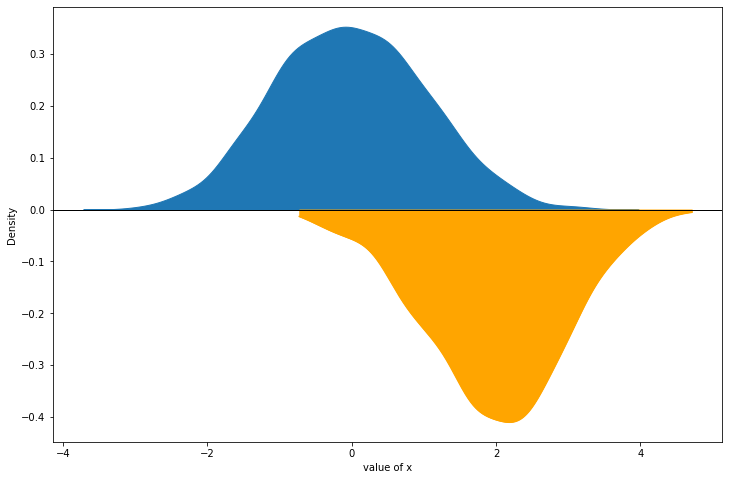

In [4]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# dataframe
df = pd.DataFrame({
'var1': np.random.normal(size=1000),
'var2': np.random.normal(loc=2, size=1000) * -1
})

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot density chart for var1
sns.kdeplot(data=df, x="var1",  fill=True, alpha=1)

# plot density chart for var2
kde = gaussian_kde(df.var2)
x_range = linspace(min(df.var2), max(df.var2), len(df.var2))

# multiply by -1 to reverse axis (mirror plot)
sns.lineplot(x=x_range*-1, y=kde(x_range) * -1, color='orange') 
plt.fill_between(x_range*-1, kde(x_range) * -1, color='orange')

# add axis names        
plt.xlabel("value of x")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')



# show the graph
plt.show()

## Mirror Histogram Chart

It is possible to apply the same technique using the `histplot()` and `bar()` functions to get a **mirror histogram**:

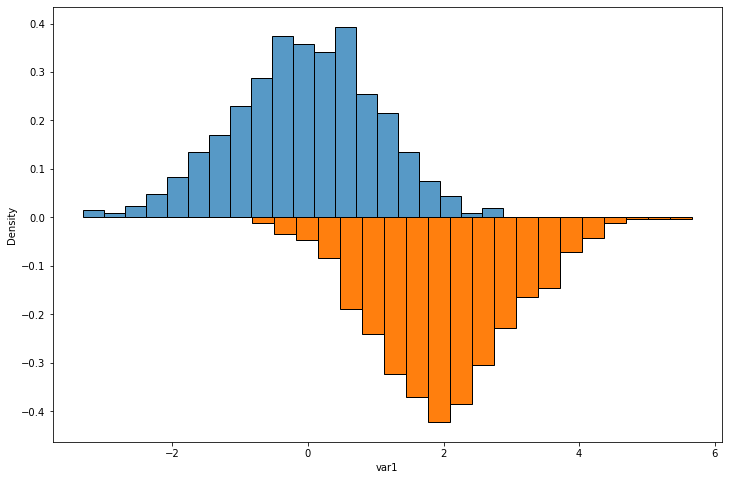

In [5]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# dataframe
df = pd.DataFrame({
'var1': np.random.normal(size=1000),
'var2': np.random.normal(loc=2, size=1000) * -1
})

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot histogram chart for var1
sns.histplot(x=df.var1, stat="density", bins=20, edgecolor='black')

# plot histogram chart for var2
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(df.var2, density=True, bins=n_bins) 
# multiply by -1 to reverse it
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

# show the graph
plt.show()